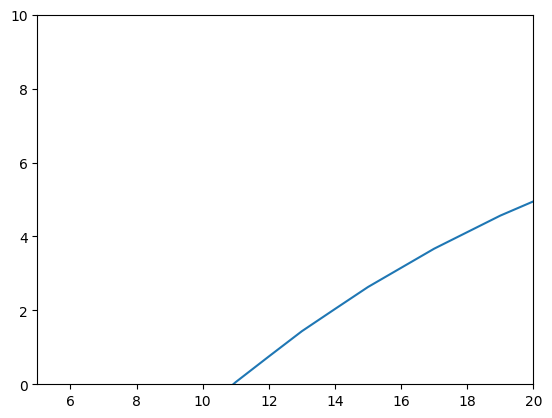

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def volume(A):
    return 15.56 * A

def surface(A):
    return -17.23 * A**(2.0/3.0)

def coulomb(A,Z):
    return -0.72*Z*(Z-1) / A**(1.0/3.0)

def assym(A,Z):
    p_aa = 93.14
    B_a=-p_aa*(Z-A/2)**2/A
    return B_a

def pair(A,Z):
    p_ap=12.0
    B_p=-p_ap/A**(1/2) 
    N=A-Z
    
    CV = np.array(Z%2 + N%2)
    B_p = np.array(B_p)
    B_p[ CV == 1 ] = -B_p[ CV == 1 ]
    B_p[ CV == 0 ] = 0

    return B_p


N = 60
Z = np.linspace(1,200,200)
A = N+Z

semf = volume(A) + surface(A) + coulomb(A,Z) + assym(A,Z) + pair(A,Z)

plt.plot(Z, semf/A)
plt.ylim([0,10])
plt.xlim([5,20])
plt.show()



       0    1   2   3             4       5                  6     7   \
0       0    1  NN   0        10.2 m    1/2+      -1.9130427(5)     R   
1       1    1   H   0        stable    1/2+    +2.792847351(9)     R   
2       1    2   H   0        stable      1+    +0.857438231(5)     R   
3       1    3   H   0       12.33 y    1/2+  +2.978962460(14))     R   
4       2    3  He   0        stable    1/2+     -2.12762531(3)     R   
...   ...  ...  ..  ..           ...     ...                ...   ...   
2150   96  247  Cm   0  1.56 x 107 y    9/2-            0.36(7)   EPR   
2151   97  249  Bk   0         330 d    7/2+             2.0(4)   EPR   
2152   99  253  Es   0        20.5 d    7/2+           +4.10(7)  AB/D   
2153   99  254  Es  84        39.3 h      2+            2.90(7)    AB   
2154  102  253  No   0        1.62 m  (9/2-)           -0.53(8)   CLS   

                                                     8         9   \
0     Re-evaluated by N.J. Stone (2013StZZ) usually ..

/var/folders/cd/cqgcr8f52t12fwclvgk0l0fm0000gn/T/ipykernel_9353/2875380131.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[7] = df_filtered[7].astype(str).str.extract(r'(-?\d+\.?\d*)').astype(float)
/var/folders/cd/cqgcr8f52t12fwclvgk0l0fm0000gn/T/ipykernel_9353/2875380131.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[6] = df_filtered[6].astype(str).str.extract(r'(-?\d+\.?\d*)').astype(float)


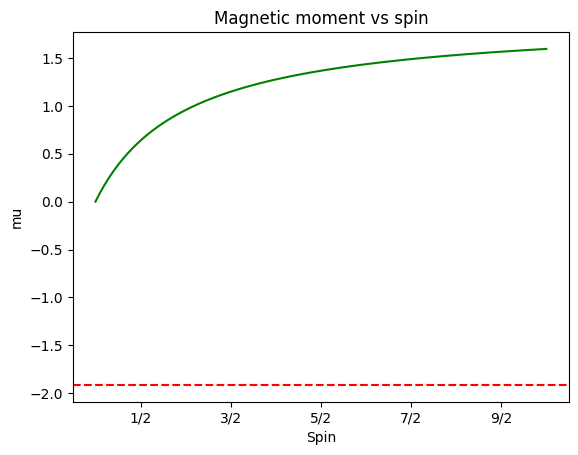

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the CSV file into a DataFrame
df = pd.read_csv('magn_mom_recomm.csv', header=None, skiprows=1)

print(df)

# Filter rows based on given conditions
df_filtered = df[(df[4] == 'stable') & (df[0] % 2 == 0) & ((df[1] - df[0]) % 2 != 0)]

# Extract and convert values from column 7
df_filtered[7] = df_filtered[7].astype(str).str.extract(r'(-?\d+\.?\d*)').astype(float)

# Extract and convert values from column 6
df_filtered[6] = df_filtered[6].astype(str).str.extract(r'(-?\d+\.?\d*)').astype(float)

# Print the values of columns 2, 3, 6, and 7
print(df_filtered[[2, 3, 6, 7]])

# Plot the values of column 7 as a function of column 6
plt.plot(df_filtered[6], df_filtered[7], 'o')

# Label the x-axis as "Spin" and the y-axis as "mu"
plt.xlabel('Spin')
plt.ylabel('mu')

# Title the plot as "Magnetic moment vs spin"
plt.title('Magnetic moment vs spin')

# Set custom x-axis ticks
plt.xticks([1, 3, 5, 7, 9], ['1/2', '3/2', '5/2', '7/2', '9/2'])

# Draw a horizontal line at -1.913
plt.axhline(y=-1.913, color='r', linestyle='--')

# Draw the line y=1.913*x/2/(x/2+1)
x = np.linspace(0, 10, 100)
y = 1.913 * x / 2 / (x / 2 + 1)
plt.plot(x, y, color='g')

# Show the plot
plt.show()